<a href="https://colab.research.google.com/github/AbrahamMulat/TensorFlow-deep-learning-Exercise-and-Project/blob/main/02_Neural_network_classification_with_TensorFlow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 02. Neural network classification with TensorFlow Exercises

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
    *Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). 
    Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data*. 
3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

# Solutions

## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

The learning rate is a very important hyper parameter for neural network training. Using the ideal learning rate plays a significance role to get a better performance.
I did some experiment on tensorflow playground website and it gives me a different result each time I run the experiment.
I use 2 hidden layers, layer1 with 4 neurons and layers2 with 2 neurons trained for around 500 epochs to do the experiment.
The following table shows the experiment's training and test loss for each learning rate.
<center>

|learning rate | test loss| training loss|
|-------------|----------- |------------ |
|0.00001| 0.478|0.473|
| 0.0001 | 0.452|0.460|
| 0.001 (default) | 0.079| 0.079|
|0.003 | 0.009| 0.009|
|0.01 | 0.011|0.003|

</center>

Thus, as we can see the results in the table above, using the default learning rate or finding the ideal learning rate is a very important thing to do when training a neural network.

## 2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
    *Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). 
    Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data*. 

In [1]:
# Import library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Let's replicate the model in the above picture

# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary classification
])

# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
# history = model.fit(train_data, train_label, epochs=epoch)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [3]:
# Check model summary
model.summary() # This throws an error as we didn't fit the model
# We'll check the summary of the model after fitting some data to it later

ValueError: ignored

## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [4]:
from sklearn.datasets import make_moons

# make 1000 samples
n_samples = 1000
# Create moons
x, y = make_moons(n_samples, noise=0.03, random_state=42)

In [5]:
# Check the feature dataset
x

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [6]:
# check labesl
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
# Check the shape of features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
# Make a dataframe of features and labels
moon_df = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
moon_df.head()

,x0,x1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [9]:
# how many values we have for each label
moon_df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

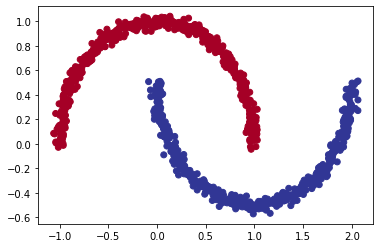

In [10]:
# Visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [11]:
# split the dataset into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shape of our data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [13]:
# Fit our model
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 6ms/step - loss: 0.1215 - accuracy: 0.9450
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.9500
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9550
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9663
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9700
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9762
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9837
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9900
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9912
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 0.9937
Epoch 11/25
25/25 [

In [14]:
# Evaluate the model on the test dataset
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000


[0.004229492042213678, 1.0]

In [15]:
## Visualize our model prediction

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


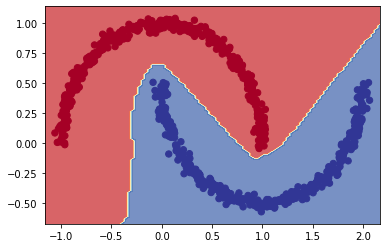

In [16]:
plot_decision_boundary(model, x_train, y_train) # plot model prediction on the training dataset

doing binary classifcation...


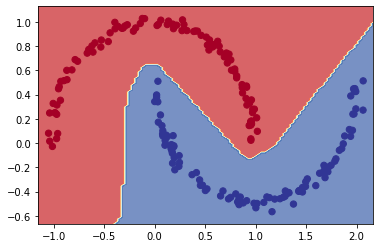

In [17]:
# Plot decision boundary on the test dataset
plot_decision_boundary(model, x_test, y_test)

## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [18]:
# Import fashin_mnist dataset
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [19]:
# Check the shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

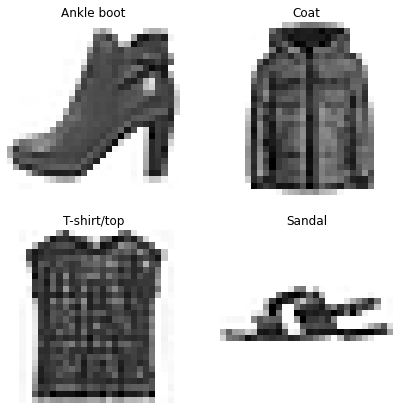

In [29]:
# Plot multiple random images of the dataset

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [30]:
!nvidia-smi

Wed Oct  5 19:06:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |    450MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
# Build a model for fashion_mnist dataset
# set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input_layer"), # Flatten the input layer
    tf.keras.layers.Dense(128, activation="relu", name="layer_1"),
    tf.keras.layers.Dense(64, activation="relu", name="layer_2"),
    tf.keras.layers.Dense(32, activation="relu", name="layer_3"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer") # apply softmax for the output layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # our labels aren't in one-hot encode
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3862 - accuracy: 0.6378
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6449 - accuracy: 0.7482
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.7926
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4583 - accuracy: 0.8355
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4219 - accuracy: 0.8489
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.8571
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3835 - accuracy: 0.8630
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3627 - accuracy: 0.8692
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3477 - accuracy: 0.8755
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.342

In [37]:
# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy'])


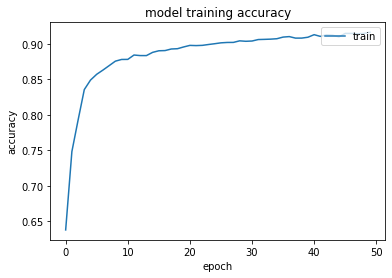

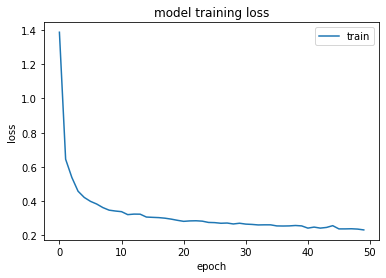

In [40]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [41]:
# Evaluate the model on the test dataset
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.8742


[0.49698135256767273, 0.8741999864578247]

In [42]:
y_pred = model_1.predict(test_data).argmax(axis=1)

In [43]:
# Plot Confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

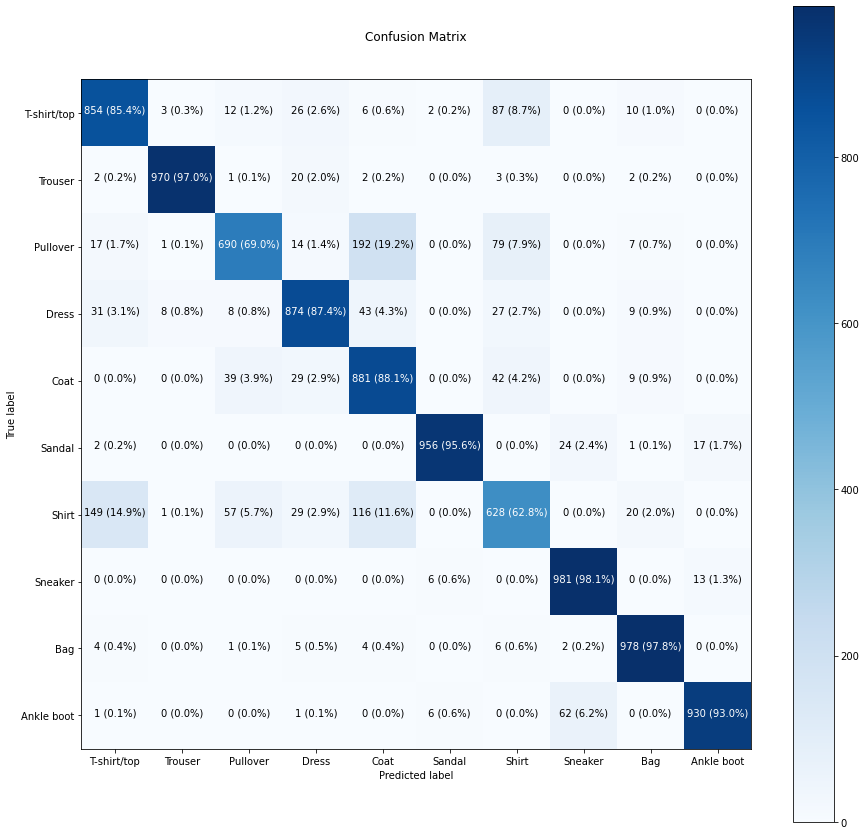

In [44]:
# Plot confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## 5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [45]:
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns: 
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x, dtype=tf.float32) # turn x into tensor 
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  z = e_x / tf.math.reduce_sum(e_x, axis=0)
  return z



In [46]:
# Create a tensor
tensor = tf.constant([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])
tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [47]:
# Apply softmax to tensor
softmax(tensor)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.00235563, 0.00235563, 0.00235563],
       [0.04731415, 0.04731415, 0.04731416],
       [0.95033014, 0.9503302 , 0.95033026]], dtype=float32)>

## 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [48]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)
# modified to plot random images
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # plot a random image
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , predicted_image[i], test_labels , test_data)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , predicted_image[i] ,  test_labels)
  plt.tight_layout()
  plt.show

In [49]:
predicted_image = model_1.predict(test_data)

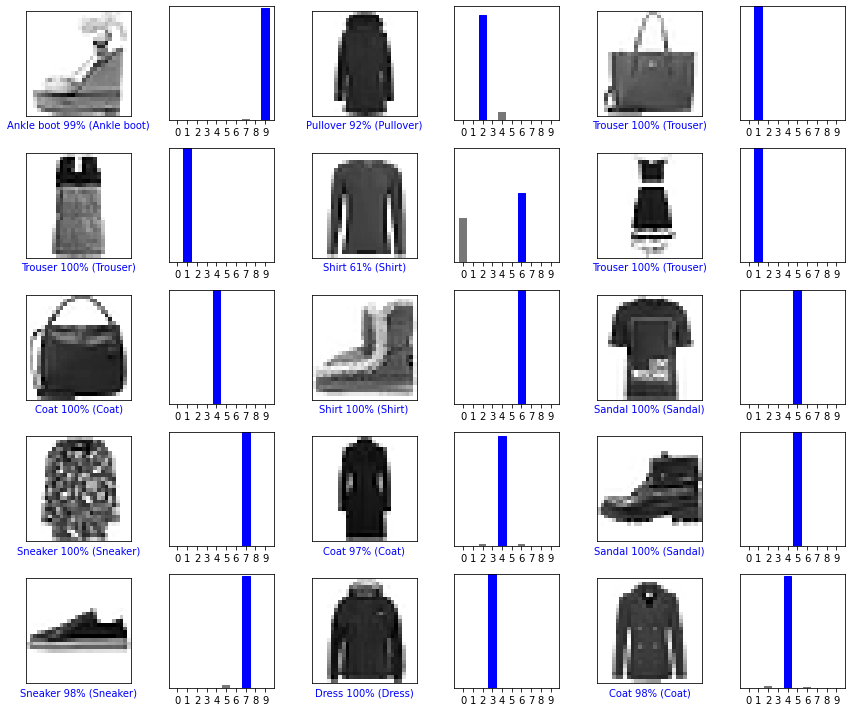

In [50]:
plot_prediction_images()